In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('C:\\Users\\user\\Documents\\data sets\\titanic.missing.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,NaN,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df = df.filter(['Age','Fare','Survived'])

In [6]:
df.isnull().mean()

Age         0.205742
Fare        0.043062
Survived    0.000000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [10]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  184.7040299669505
Age Variance after 99 wala imputation:  968.561345241049
Age Variance after -1 wala imputation:  300.556813763464
Original Fare variable variance:  2341.30899370925
Fare Variance after 999 wala imputation:  29427.780433159194
Fare Variance after -1 wala imputation:  2305.6291141755187


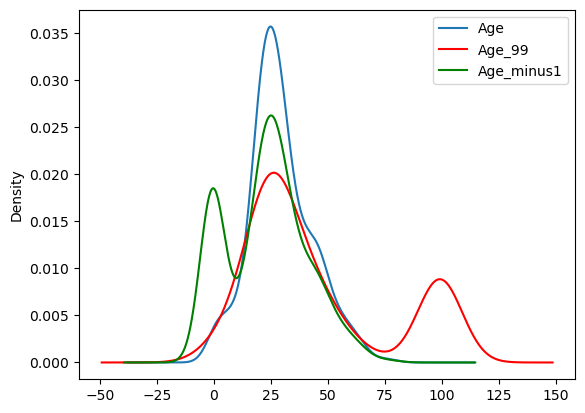

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

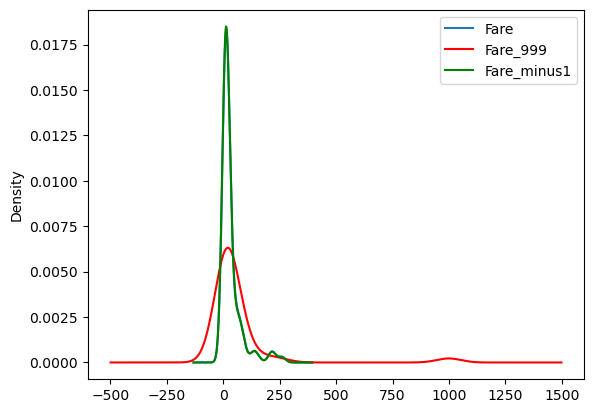

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [13]:
X_train.cov()

,Age,Fare,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,184.704030,218.507658,184.704030,184.704030,432.649692,202.603774
Fare,218.507658,2341.308994,-133.557598,302.184471,2341.308994,2341.308994
Age_99,184.704030,-133.557598,968.561345,-213.474583,13.082474,-134.640098
Age_minus1,184.704030,302.184471,-213.474583,300.556814,480.880556,286.404643
Fare_999,432.649692,2341.308994,13.082474,480.880556,29427.780433,1301.241106
Fare_minus1,202.603774,2341.308994,-134.640098,286.404643,1301.241106,2305.629114


In [14]:
X_train.corr()

,Age,Fare,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.303867,1.000000,1.000000,0.183428,0.282551
Fare,0.303867,1.000000,-0.088429,0.362306,1.000000,1.000000
Age_99,1.000000,-0.088429,1.000000,-0.395657,0.002450,-0.090098
Age_minus1,1.000000,0.362306,-0.395657,1.000000,0.161694,0.344050
Fare_999,0.183428,1.000000,0.002450,0.161694,1.000000,0.157974
Fare_minus1,0.282551,1.000000,-0.090098,0.344050,0.157974,1.000000


# Using Sklearn

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [16]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')


In [17]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [18]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [19]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [20]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [21]:
X_train 

array([[2.300000e+01, 8.662500e+00],
       [2.000000e+00, 2.021250e+01],
       [3.900000e+01, 1.341670e+01],
       [2.100000e+01, 7.225000e+00],
       [3.100000e+01, 2.100000e+01],
       [8.000000e+00, 2.600000e+01],
       [9.900000e+01, 7.000000e+00],
       [3.700000e+01, 8.315830e+01],
       [1.700000e+01, 4.710000e+01],
       [3.100000e+01, 2.100000e+01],
       [8.300000e-01, 9.350000e+00],
       [9.900000e+01, 2.655000e+01],
       [2.200000e+01, 8.962500e+00],
       [9.900000e+01, 2.167920e+01],
       [2.700000e+01, 7.895800e+00],
       [2.100000e+01, 7.854200e+00],
       [4.500000e+01, 6.335830e+01],
       [2.200000e+01, 1.050000e+01],
       [9.900000e+01, 2.100000e+01],
       [3.200000e+01, 7.579200e+00],
       [9.900000e+01, 1.450000e+01],
       [2.500000e+01, 2.600000e+01],
       [2.600000e+01, 2.202500e+01],
       [2.500000e+01, 5.544170e+01],
       [9.900000e+01, 2.167920e+01],
       [4.600000e+01, 7.524170e+01],
       [3.000000e+01, 4.550000e+01],
 